Training with momentum: 0.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with momentum: 0.5
Training with momentum: 0.9
Training with momentum: 0.99


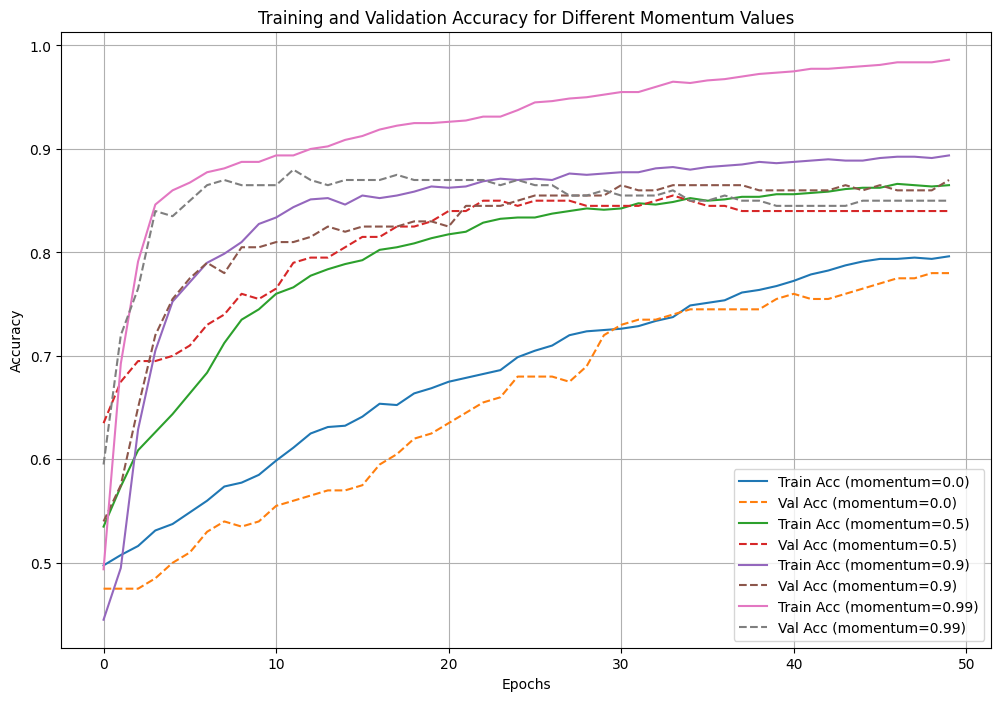

Max validation accuracy for momentum=0.0: 0.7800
Max validation accuracy for momentum=0.5: 0.8550
Max validation accuracy for momentum=0.9: 0.8700
Max validation accuracy for momentum=0.99: 0.8800
Best momentum value: 0.99 with validation accuracy: 0.8800
Training with Adagrad
Training with Adam
Training with RMSprop


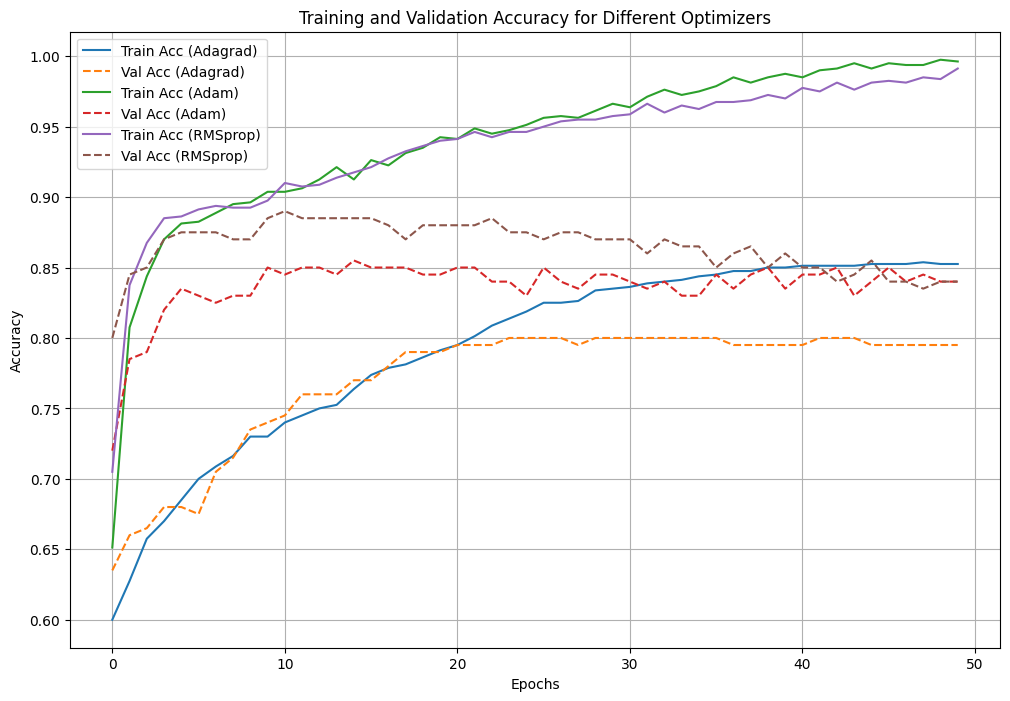

Max validation accuracy for Adagrad: 0.8000
Max validation accuracy for Adam: 0.8550
Max validation accuracy for RMSprop: 0.8900
Best optimizer: RMSprop with validation accuracy: 0.8900


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build and compile the model
def build_model(optimizer):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Best learning rate from previous experiment
best_lr = 0.001

# Momentum values to test
momentum_values = [0.0, 0.5, 0.9, 0.99]  # Ensure values are floats between 0 and 1
history_dict_momentum = {}

# Train model for each momentum value using SGD
for momentum in momentum_values:
    print(f"Training with momentum: {momentum}")
    optimizer = SGD(learning_rate=best_lr, momentum=momentum)
    model = build_model(optimizer)
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=0)
    history_dict_momentum[momentum] = history

# Plot training and validation accuracy curves for different momentum values
plt.figure(figsize=(12, 8))

for momentum, history in history_dict_momentum.items():
    plt.plot(history.history['accuracy'], label=f'Train Acc (momentum={momentum})')
    plt.plot(history.history['val_accuracy'], label=f'Val Acc (momentum={momentum})', linestyle='dashed')

plt.title('Training and Validation Accuracy for Different Momentum Values')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Note the best momentum based on validation accuracy
best_momentum = None
max_val_acc_momentum = 0
for momentum, history in history_dict_momentum.items():
    val_acc = max(history.history['val_accuracy'])
    print(f"Max validation accuracy for momentum={momentum}: {val_acc:.4f}")
    if val_acc > max_val_acc_momentum:
        max_val_acc_momentum = val_acc
        best_momentum = momentum

# Print the best momentum value and its validation accuracy
print(f"Best momentum value: {best_momentum} with validation accuracy: {max_val_acc_momentum:.4f}")

# Test Adagrad, Adam, and RMSprop optimizers
optimizers = {
    "Adagrad": Adagrad(learning_rate=best_lr),
    "Adam": Adam(learning_rate=best_lr),
    "RMSprop": RMSprop(learning_rate=best_lr)
}

history_dict_optimizers = {}

# Train model for each optimizer
for opt_name, optimizer in optimizers.items():
    print(f"Training with {opt_name}")
    model = build_model(optimizer)
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=0)
    history_dict_optimizers[opt_name] = history

# Plot training and validation accuracy curves for different optimizers
plt.figure(figsize=(12, 8))

for opt_name, history in history_dict_optimizers.items():
    plt.plot(history.history['accuracy'], label=f'Train Acc ({opt_name})')
    plt.plot(history.history['val_accuracy'], label=f'Val Acc ({opt_name})', linestyle='dashed')

plt.title('Training and Validation Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Note the best optimizer based on validation accuracy
best_optimizer = None
max_val_acc_optimizer = 0
for opt_name, history in history_dict_optimizers.items():
    val_acc = max(history.history['val_accuracy'])
    print(f"Max validation accuracy for {opt_name}: {val_acc:.4f}")
    if val_acc > max_val_acc_optimizer:
        max_val_acc_optimizer = val_acc
        best_optimizer = opt_name

# Print the best optimizer and its validation accuracy
print(f"Best optimizer: {best_optimizer} with validation accuracy: {max_val_acc_optimizer:.4f}")
